# Classification of Customers

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

**Objective**: Use *k*-Nearest Neighbors to classify customers into group memberships for a telecommunications provider. 

[*k*-Nearest Neighbors (*k*-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a supervised learning algorithm where the data is trained with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the k-nearest data points and chooses the class in which the majority of the k-nearest data points belong to as the predicted class.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df = pd.read_csv(file_url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Understand the dataset

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called `custcat`, has four possible values that correspond to the four customer groups, as follows: 
- 1 -> Basic Service 
- 2 -> E-Service 
- 3 -> Plus Service 
- 4 -> Total Service

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


##  Visualize the dataset

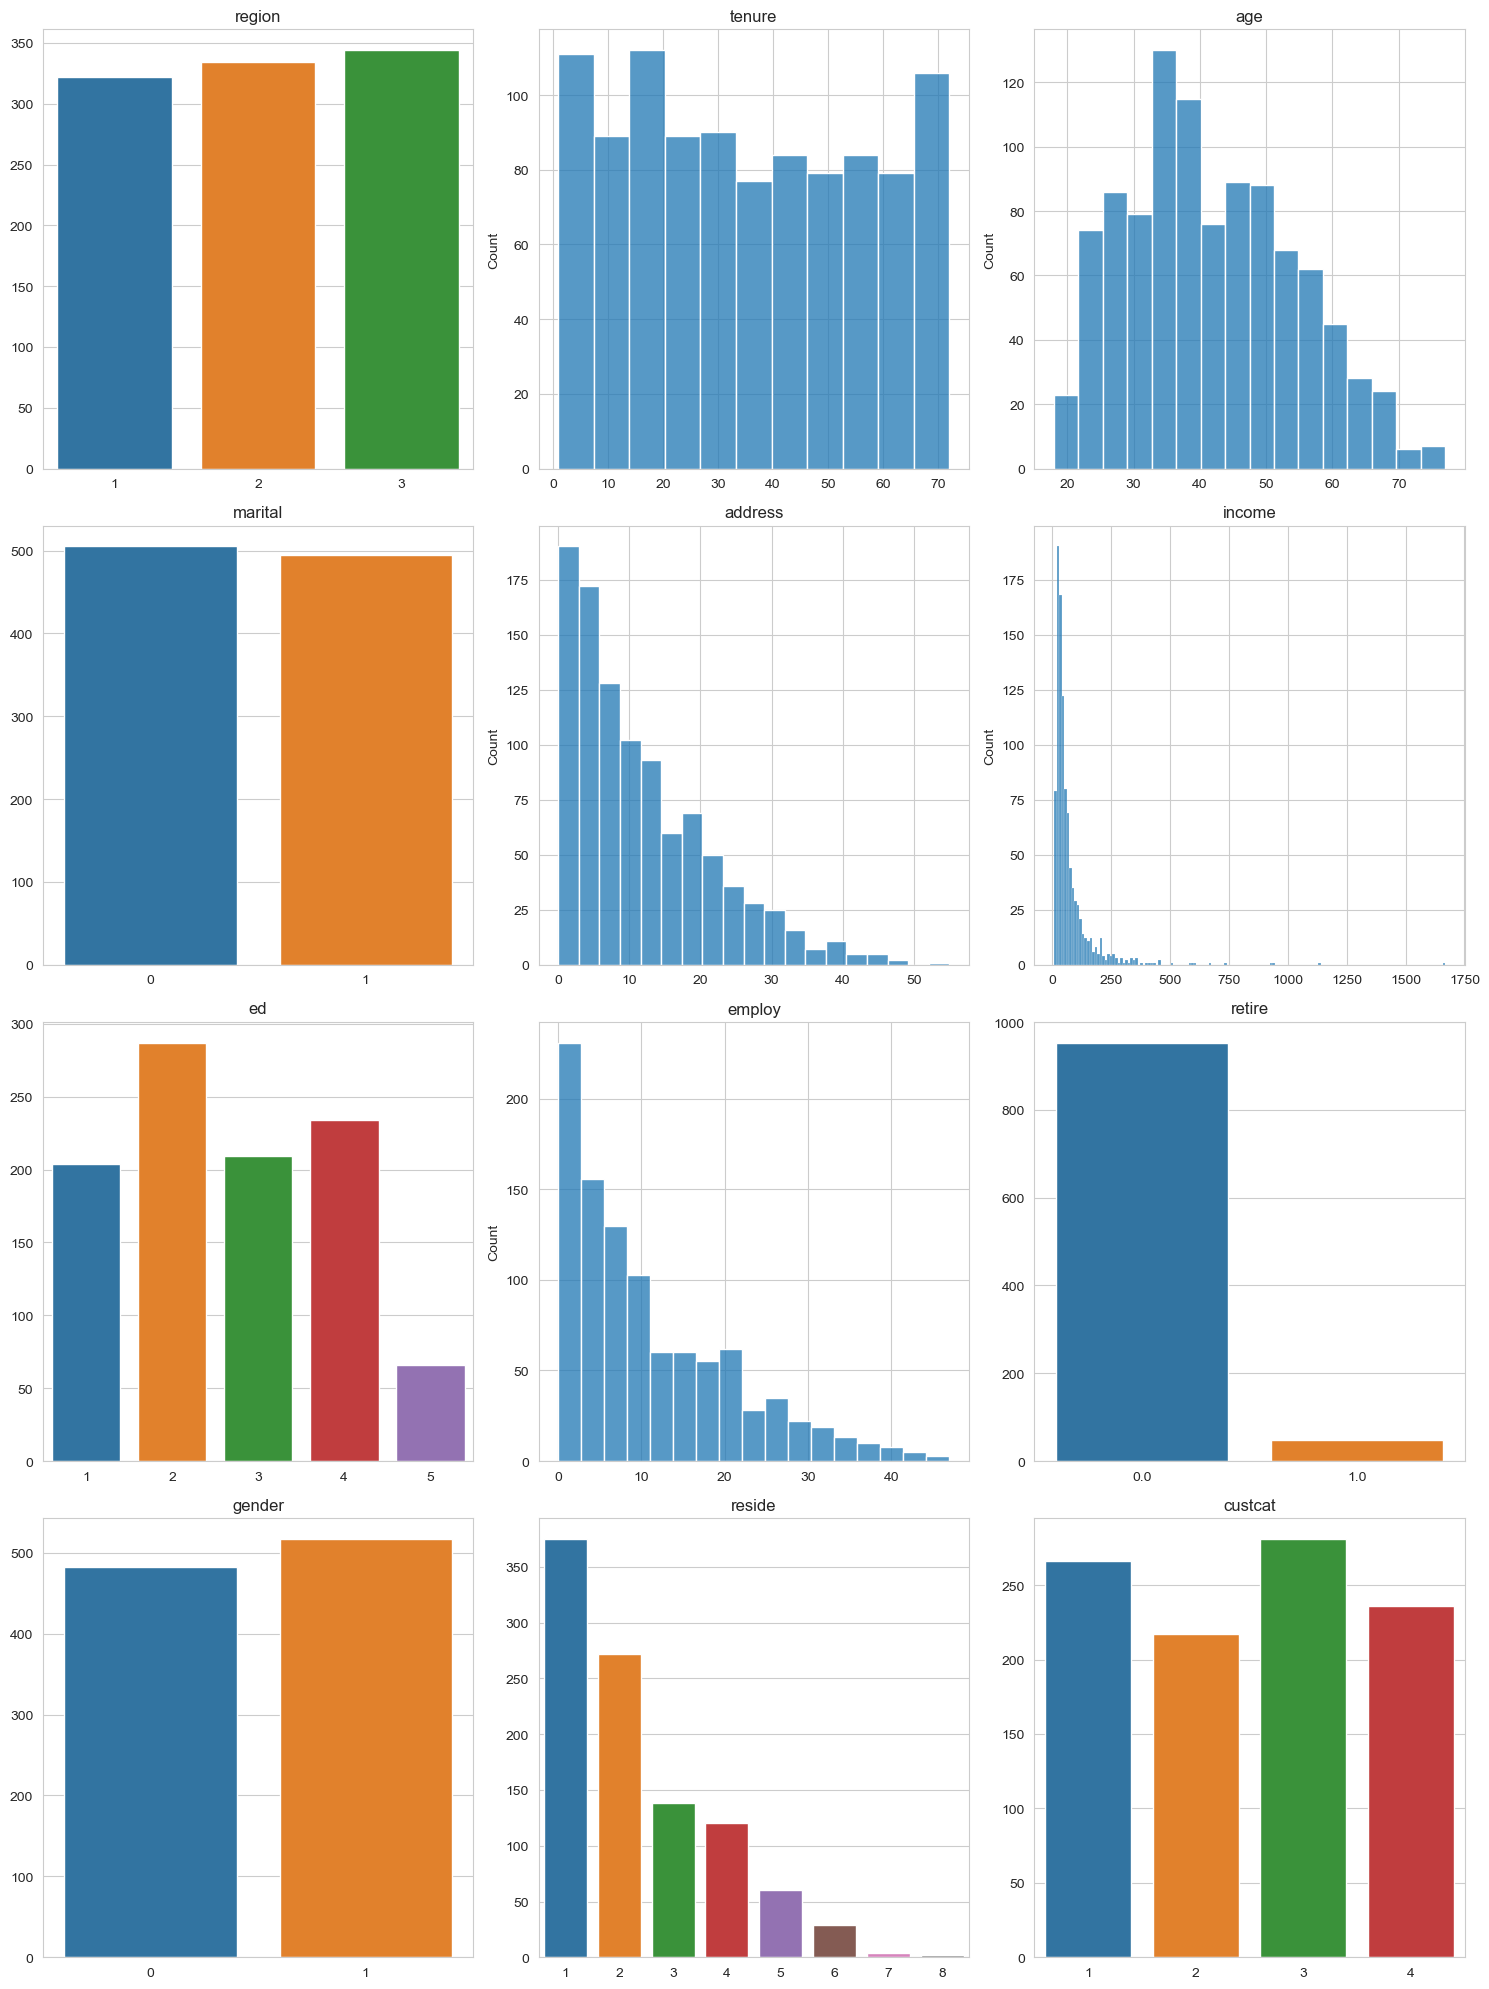

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for ax, feature in zip(axs.flatten(), df.columns):
    if len(df[feature].unique()) <= 10:
        labels, sizes = np.unique(df[feature], return_counts=True)
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_title(feature)
        ax.set_xlabel("")
    else:
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_xlabel("")
        ax.set_title(feature)

plt.tight_layout()
plt.show()

## Visualize the class distribution

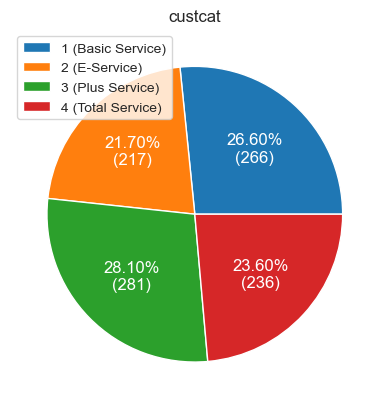

In [5]:
cuscat_dictionary = {1: "Basic Service", 2: "E-Service", 3: "Plus Service", 4: "Total Service"}
labels, sizes = np.unique(df["custcat"], return_counts=True)

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend([str(label) + " (" + cuscat_dictionary[label] + ")" for label in labels])
ax.set_title("custcat")
plt.show()

## Preprocess the dataset

Data standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as *k*-NN which is based on the distance of data points.

In [6]:
X = df.drop("custcat", axis=1)
y = df["custcat"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


## Split the dataset into train and test subsets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (750, 11)
X_test shape: (250, 11)


##  Train a Decision Tree classifier

In [8]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Get the most important features

In [9]:
feature_importances = pd.DataFrame(data={"Feature": X_train.columns, "Gini importance": classifier.feature_importances_}).sort_values(by="Gini importance", ascending=False).reset_index(drop=True)
most_important_features = feature_importances[feature_importances["Gini importance"] >= 0.1]
most_important_features

,Feature,Gini importance
0,tenure,0.192281
1,income,0.143921
2,age,0.132519
3,employ,0.128980
4,address,0.123312
5,ed,0.100916


## Find the best number of neighbors for a *k*-NN classifier

To choose the right value for the number of neighbors, the general solution is to reserve a part of the data for testing the accuracy of the model. Then choose `n_neighbors = i`, use the training part for modeling, and calculate the accuracy of prediction using all samples in the test set. Repeat this process, increasing the number of neighbors, and see which value is the best for the model.

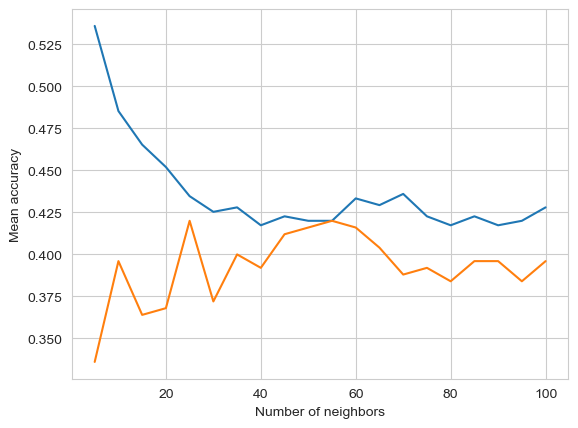

In [10]:
accuracies_train = []
accuracies_test = []
number_of_neighbors = [i for i in range(5, 101, 5)]

for i in number_of_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train[most_important_features["Feature"]], y_train)
    accuracies_train.append(knn.score(X_train[most_important_features["Feature"]], y_train))
    accuracies_test.append(knn.score(X_test[most_important_features["Feature"]], y_test))

plt.figure()
plt.plot(number_of_neighbors, accuracies_train, label="Train accuracy")
plt.plot(number_of_neighbors, accuracies_test, label="Test accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Mean accuracy")
plt.show()